# Project on Stochastic Gradient Descent on Vehicle Performance

## Abstract: 
        
   Most players in the automotive sector are investing in ML for their marketing efforts, a much smaller group is putting in place incentives and key performance indicators (KPIs) to use more ML and automation. Closing the 
gap requires a stronger commitment to developing ML capability that is not just useful but also used.

## Problem Statement:
   Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled per litre)

# Stochastic Gradient Descent 
  We are going to build a model using machine learning.Here we have vechicle performance data.We are using regression to find the the performace based on how the dependent variable is influeced  by independent variables.
Our goal is to find out how much data is distributed from the mean and how to minimize the error.

### Exploratory data analysis

In [1]:
# importing the libraries:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading csv file using pandas
mydata=pd.read_csv("data.csv")

In [3]:
mydata.head()# it will show first 5 rows

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [4]:
# To find the datatype of our data
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
# To find the measure of central tendency(mean,median,mode,quantile range)
mydata.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


##### Converting the datatype:
   Here our datatype for horsepower is object, so we need to convert it into float unless we cannot use it in  the model. We need to remove  '?' from horsepower.

In [6]:
#converting the datatype:
mydata = mydata.replace('?', np.nan).dropna() # removing '?
mydata['horsepower']=pd.to_numeric(mydata['horsepower'],downcast="float")# object to float

In [7]:
mydata

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84.0,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79.0,2625,18.6,1982,ford ranger,11.904024


###### In our dataset we have some character datavalues.We need to drop those columns. Here columns like  names and year are charcter datatype.

In [8]:
#selecting only the columns to be used
col_to_use = ["origin","cylinders","displacement","horsepower","weight","acceleration","Kilometer_per_liter"]

In [9]:
#creating dataframe.
mydata= mydata[col_to_use]

In [10]:
mydata.head(20)

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,7.652587
1,1,8,350.0,165.0,3693,11.5,6.377156
2,1,8,318.0,150.0,3436,11.0,7.652587
3,1,8,304.0,150.0,3433,12.0,6.802299
4,1,8,302.0,140.0,3449,10.5,7.227443
5,1,8,429.0,198.0,4341,10.0,6.377156
6,1,8,454.0,220.0,4354,9.0,5.952012
7,1,8,440.0,215.0,4312,8.5,5.952012
8,1,8,455.0,225.0,4425,10.0,5.952012
9,1,8,390.0,190.0,3850,8.5,6.377156


##### Checking null values


In [11]:
mydata.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
Kilometer_per_liter    0
dtype: int64

##### Bivariate Analysis

##### Finding correlation: To find the relationship between the variables.

In [12]:
mydata_corr= mydata.corr()

In [13]:
mydata_corr

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
origin,1.000000,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.565209
cylinders,-0.568932,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.777618
displacement,-0.614535,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,-0.455171,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,-0.585005,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,0.212746,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.423329
Kilometer_per_liter,0.565209,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,1.000000


### Heatmap

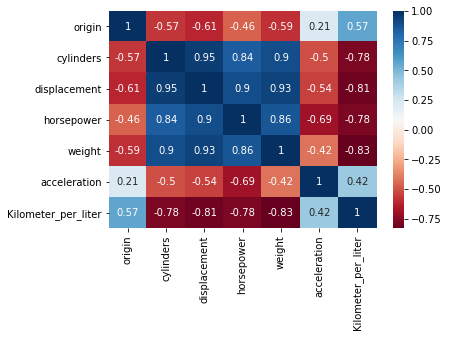

In [14]:
sns.heatmap(mydata_corr, annot = True, cmap = "RdBu")
# use heatmap to display the correlation between variables
# blue represents good correction and values > 0.5
# red represents bad correction and values < 0.5

#### Pairplot

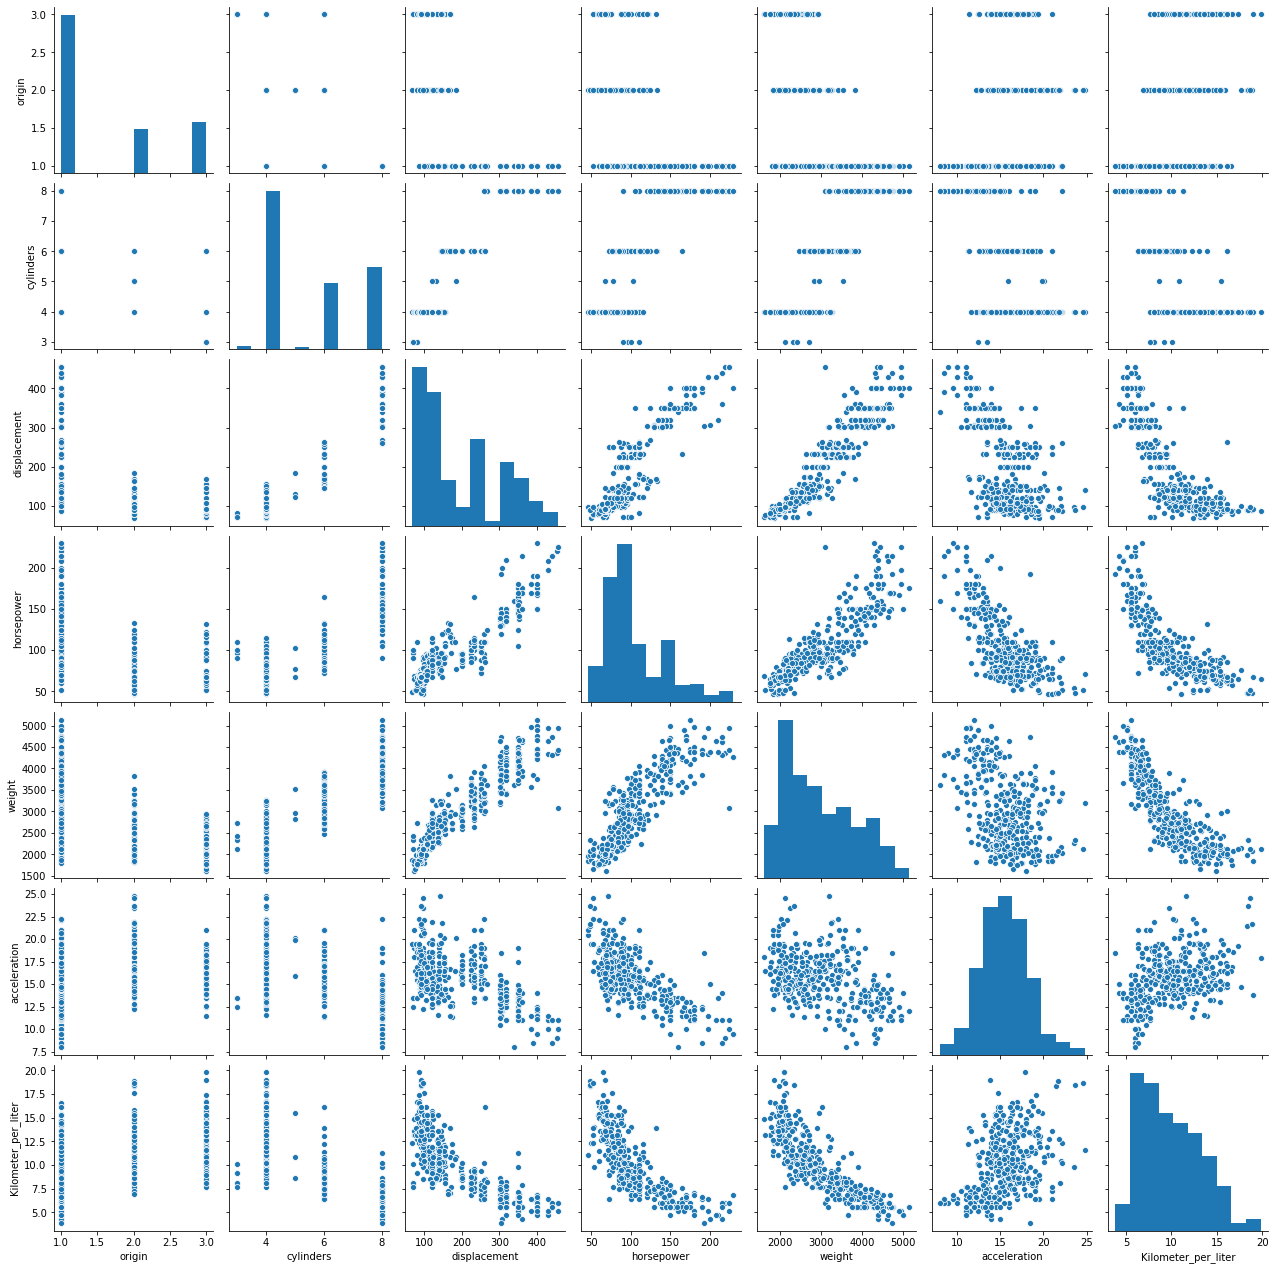

In [15]:
sns.pairplot(mydata) # used to find the linearity between the variables.

In [52]:
mydata.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.576531,5.471939,194.411990,104.469391,2977.584184,15.541327,9.967885
std,0.805518,1.705783,104.644004,38.491138,849.402560,2.758864,3.318250
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,3.826293
25%,1.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,7.227443
50%,1.000000,4.000000,151.000000,93.500000,2803.500000,15.500000,9.672019
75%,2.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,19.811697


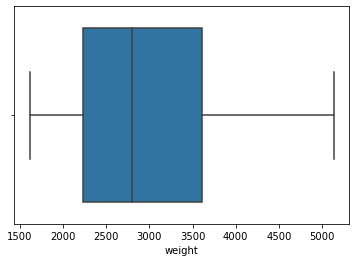

In [51]:
sns.boxplot(mydata['weight'])

#### Boxplot

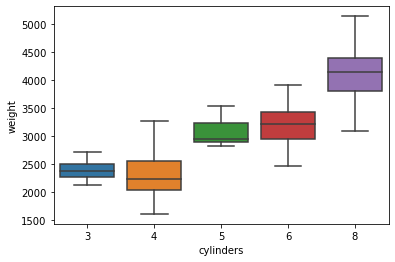

In [16]:
# used to find the outlier and used in categorical variables.
sns.boxplot(x = "cylinders",y = "weight", data = mydata)

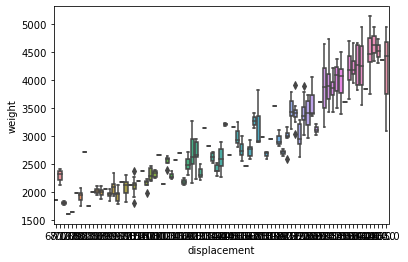

In [17]:
sns.boxplot(x = "displacement",y = "weight", data = mydata)

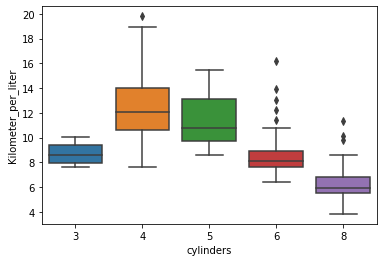

In [18]:
sns.boxplot(x = "cylinders",y = "Kilometer_per_liter", data = mydata)

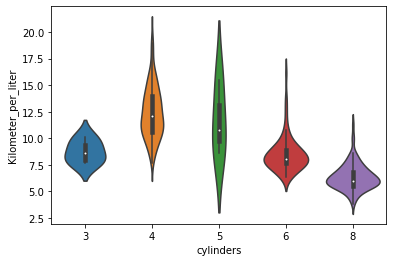

In [19]:
sns.violinplot(x = "cylinders",y = "Kilometer_per_liter", data = mydata)

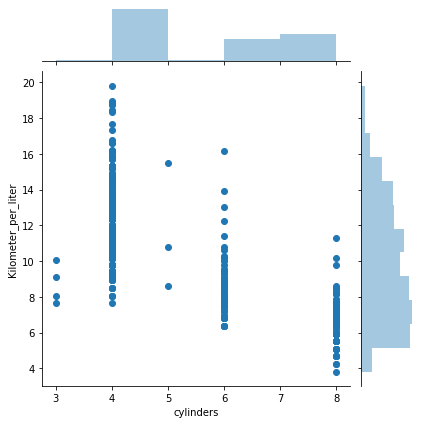

In [20]:
sns.jointplot(x = "cylinders",y = "Kilometer_per_liter", data = mydata)

#### Scatter plot

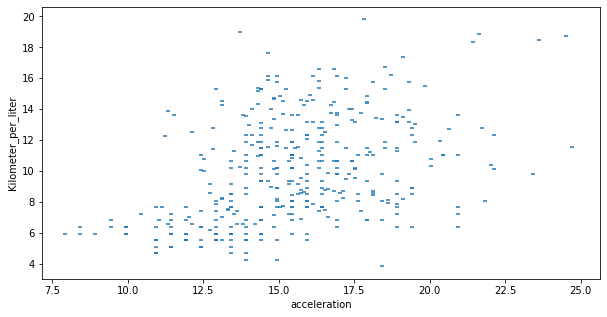

In [21]:
mydata.plot.scatter(x = "acceleration", y = "Kilometer_per_liter", marker = 0, figsize = (10,5))
# the graph shows that how acceleration  increses with kilometre_per_litre.

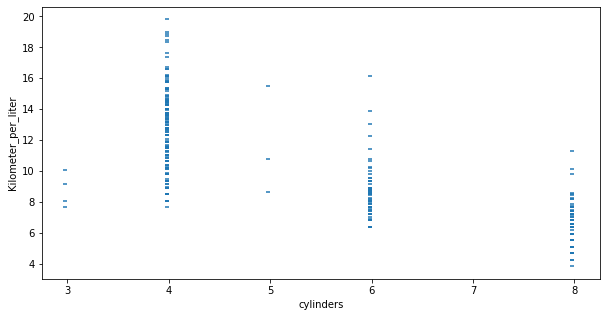

In [22]:
mydata.plot.scatter(x = "cylinders", y = "Kilometer_per_liter", marker = 0, figsize = (10,5))

#### Separating independent and dependent variable

In [23]:
# Dependent Variable: (Kilometer_per_liter is dependent variable)
y_dep = mydata.Kilometer_per_liter

In [24]:
y_dep

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 392, dtype: float64

In [25]:
# Dependent variable:
x_ind = mydata.drop("Kilometer_per_liter", axis =1)
x_ind

,origin,cylinders,displacement,horsepower,weight,acceleration
0,1,8,307.0,130.0,3504,12.0
1,1,8,350.0,165.0,3693,11.5
2,1,8,318.0,150.0,3436,11.0
3,1,8,304.0,150.0,3433,12.0
4,1,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6
394,2,4,97.0,52.0,2130,24.6
395,1,4,135.0,84.0,2295,11.6
396,1,4,120.0,79.0,2625,18.6


In [26]:
# checking p value  using OLS (Ordinary Least Square)
import statsmodels.api as sm


In [27]:
model=sm.OLS(y_dep,x_ind)#giving dependent and independent variable

In [28]:
my_fit = model.fit() #Fitting the model using ols

In [29]:
my_fit.summary() # The summary will display the values of R squared 
                 #  and p value for this dataset
                 # if R squared > 0.5 model is good fit and good correlation. 
                 # if R squared <= 0.5 it is not good fit and bad correlation 
                 #  and it wont give any good prediction.
                 # here we have R squared = o.9 and it is good correlation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Kilometer_per_liter   R-squared (uncentered):                   0.954
Model:                             OLS   Adj. R-squared (uncentered):              0.953
Method:                  Least Squares   F-statistic:                              1326.
Date:                 Thu, 07 Oct 2021   Prob (F-statistic):                   4.64e-254
Time:                         12:57:51   Log-Likelihood:                         -875.83
No. Observations:                  392   AIC:                                      1764.
Df Residuals:                      386   BIC:                                      1787.
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
origin           1.2389      0.184      6.741      0.000       0.878       1.600
cylinders        0.7222      0.207      3.486      0.001       0.315       1.130
displacement    -0.0125      0.005     -2.533      0.012      -0.022      -0.003
horsepower       0.0352      0.008      4.548      0.000       0.020       0.050
weight          -0.0025      0.000     -5.643      0.000      -0.003      -0.002
acceleration     0.6479      0.041     15.702      0.000       0.567       0.729
==============================================================================
Omnibus:                       17.389   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.608
Skew:                           0.405   Prob(JB):                     2.03e-05
Kurtosis:                       3.816   Cond. No.                     5.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Machine Learning with Stochastic Gradient Descent
   Linear Regression is a linear approximation of casual relationship between twp or more variables.Gradient Descent is a first order iterative optimization algorithm for finding minimun of a function. Stochastic Gradient Descent uses a single sample to perform each iteration. sample is randomly shuffl;ed and selected for performing the iteration.

##### Training linear regression model with SGD for prediction

In [30]:
#Train and test data: splitting data into train and test data.
# we use train data to model data and test data to predict the value.
#importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [31]:
# x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,train_size = 0.8,random_state =1) 
# splitting 80% of data into train and 20% into test data

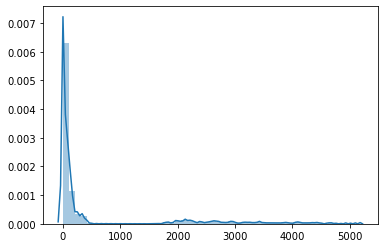

In [32]:
sns.distplot(x_train) # before standardization.

In [33]:
#In SGD, we are working on iteration(distance,  we want  standardized data that is mean = 0 and sd=1 
#we are importing standardscaler from sklearn.

from sklearn.preprocessing import StandardScaler

In [34]:
norm=StandardScaler()

In [35]:
#we are fitting the model from standard x_train and x_test
x_train=norm.fit_transform(x_train)
x_test=norm.fit_transform(x_test)

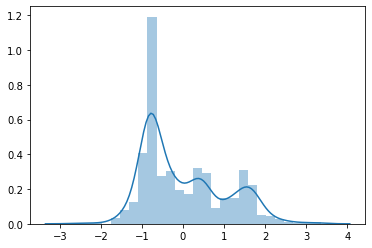

In [36]:
sns.distplot(x_train) # normalized bell curve(mean = 0 and sd = 1)

In [37]:
#Importing SGDRegressor from sklearn to model the data
from sklearn.linear_model import SGDRegressor

In [38]:
model=SGDRegressor()

In [39]:
# Fitting the model
model.fit(x_train,y_train)

SGDRegressor()

In [40]:
# Using X_test(20% of data) we are predicting the values.
y_pred=model.predict(x_test)
y_pred

array([12.3242819 , 13.38580628, 13.0831012 , 10.78279451, 13.85227209,
       12.08464149, 12.85626204,  6.52922212, 12.81391516, 13.24574686,
        9.15574616, 12.77434099,  7.62323692, 13.87156814, 11.28871024,
        8.02539571, 11.53968568, 13.09981015,  4.49850674, 10.00630677,
       12.60492596,  8.60549716,  7.84115577,  6.13181034,  5.06649509,
        6.91001714, 13.7296622 ,  8.87154665,  9.59042135, 11.51677722,
        7.93319608, 10.83183542,  5.94316639,  9.86029792,  9.09889883,
        6.82257533,  8.7729443 ,  8.92018299, 13.90303691, 13.15881451,
        5.3243635 ,  5.5734177 , 11.10063084, 10.02646707, 10.20369002,
        8.44998531,  5.18625589, 13.86333434,  9.5279065 ,  4.04274863,
        7.44438625,  9.80342056, 10.88069812, 11.66094299, 13.5727765 ,
       10.09491702, 10.29575884, 10.91964242, 11.08155767, 14.31328735,
       10.12675772, 12.02942959, 13.92965372,  8.90587258,  9.96306315,
        9.76978385, 10.68501488,  7.25392365, 13.24847066,  4.61

In [41]:
#Finding Accuracy for our model
model.score(x_test,y_test)

# Our accuracy is 74% that means 74% of data is on the regression.

0.7354691914235072

In [42]:
#Creating dataframe from actual and predicted value and comparing the values.
f_com=pd.DataFrame({"Actual":y_test,"Machine_predicted":y_pred})

In [43]:
f_com

,Actual,Machine_predicted
82,9.778305,12.324282
167,12.329168,13.385806
356,13.774656,13.083101
120,8.077730,10.782795
385,16.155461,13.852272
...,...,...
23,11.053736,11.753840
295,15.177630,12.406349
13,5.952012,6.345553
91,5.526868,6.019897


In [44]:
#Residual: Calculating the error by finding the difference between y_pred and t_test
Res=y_pred-y_test

In [45]:
Res

82     2.545977
167    1.056639
356   -0.691555
120    2.705064
385   -2.303189
         ...   
23     0.700103
295   -2.771282
13     0.393541
91     0.493028
62     0.547584
Name: Kilometer_per_liter, Length: 79, dtype: float64

In [46]:
com_g=f_com.head(23)

In [47]:
com_g

,Actual,Machine_predicted
82,9.778305,12.324282
167,12.329168,13.385806
356,13.774656,13.083101
120,8.077730,10.782795
385,16.155461,13.852272
238,14.242314,12.084641
79,11.053736,12.856262
93,5.952012,6.529222
81,11.904024,12.813915
337,13.774656,13.245747


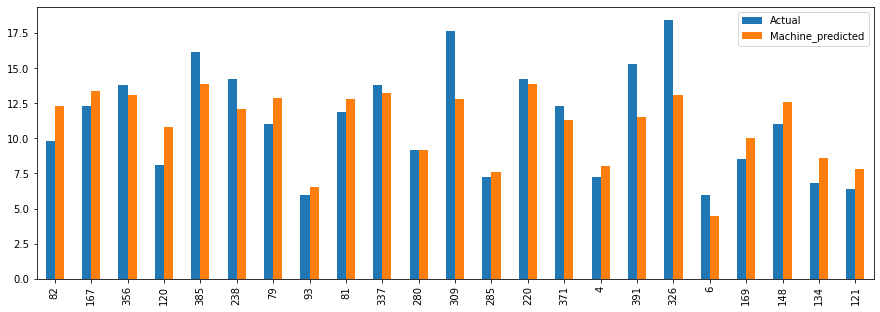

In [48]:
com_g.plot(kind="bar",figsize=(15,5));

## Conclusion:

  Thus  by training  linear regression model with SGD for prediction  to the given vehicle prediction dataset. We conclude that the accuracy for the predicted model of given dataset is 74% . Our goal is to minimize the error and to  understand how  the variables are related to each other and how the dependent variable affected by independent variable.By using SGD we minimized the error and we find the relationship between the variables.